In [1]:
import plotly.graph_objects as go
import plotly as py
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [8]:
con = sqlite3.connect('../data/experiment_data/2021-09-06-generated-data.db')

sql = '''
SELECT
a.trial_id,
a.batch,
a.test_acc,
a.config_id,
unc_pct
FROM (results
INNER JOIN trials ON results.trial_id = trials.trial_id) as a
INNER JOIN configurations ON a.config_id = configurations.config_id
'''

df = pd.read_sql(sql, con)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trial_id   7920 non-null   int64  
 1   batch      7920 non-null   int64  
 2   test_acc   7920 non-null   float64
 3   config_id  7920 non-null   int64  
 4   unc_pct    7920 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 309.5 KB


,trial_id,batch,test_acc,config_id,unc_pct
0,35,1,0.104215,1,0.0
1,35,2,0.173014,1,0.0
2,35,3,0.222008,1,0.0
3,35,4,0.281639,1,0.0
4,35,5,0.317716,1,0.0


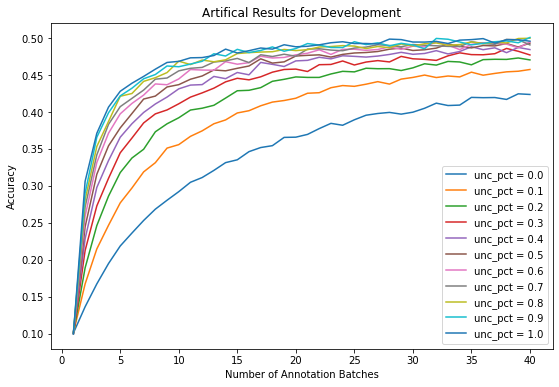

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
grouped = df.groupby(['unc_pct', 'batch'])['test_acc'].mean()
for unc_pct in df['unc_pct'].unique():
    ax.plot(grouped.loc[unc_pct], label=f'unc_pct = {round(unc_pct, 1)}')
ax.legend()
ax.set_xlabel('Number of Annotation Batches')
ax.set_ylabel('Accuracy')
ax.set_title('Artifical Results for Development')
plt.savefig('../images/generated_results.png')

In [6]:
plt.savefig('../images/experimental_results.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
for x in [i/100 for i in range(101)]:
    

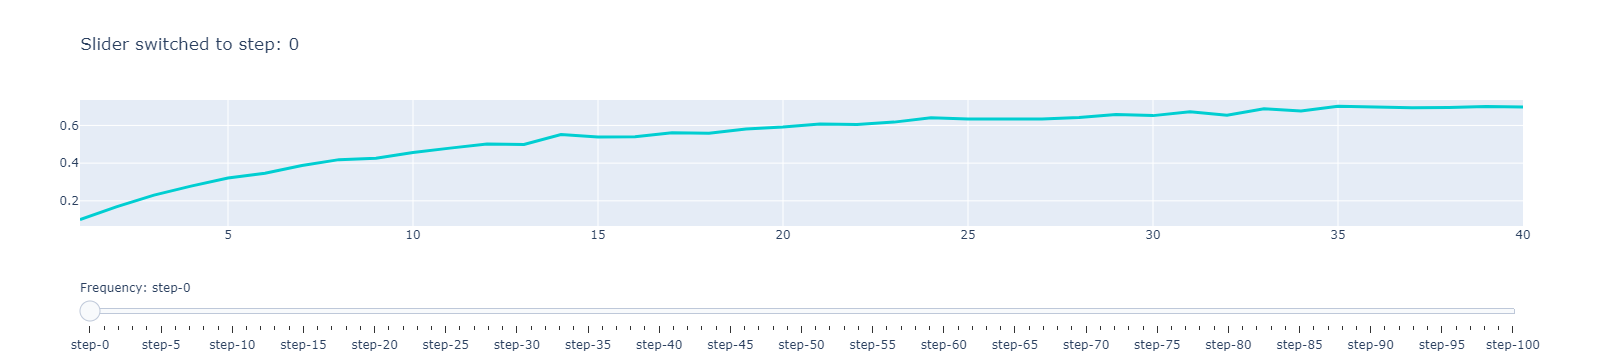

In [5]:
fig = go.Figure()
ix_lvl_1 = grouped.index.get_level_values(0).unique()
for x in [i/100 for i in range(101)]:
    if x in ix_lvl_1:
        s = grouped.loc[x]
    else:
        ix_2 = ix_lvl_1[np.where(ix_lvl_1 >= x)[0][0]]
        ix_1 = ix_lvl_1[np.where(ix_lvl_1 >= x)[0][0] - 1]
        s = grouped.loc[ix_1] + ((x - ix_1) / (ix_2 - ix_1)) * (grouped.loc[ix_2] - grouped.loc[ix_1])
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=3),
            name="unc_pct = " + str(x),
            x=s.index,
            y=s))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()